In [1]:
import zipfile
import os
import numpy as np

from PIL import Image
from typing import List, Optional
from PIL import ImageOps

class BaseImage:
    def __init__(self,folder: str, filenames: List[str]):
        self.folder = folder
        self.filenames = filenames
        self.existant = [os.path.isfile(f"{folder}/{f}") for f in filenames]
        
    def __getitem__(self, index):
        return Image.open(f"{self.folder}/{self.filenames[index]}")
    
    def __len__(self):
        return np.sum(self.existant)
    
class BasePredictor:
    pass
    
class Prediction(BasePredictor):
    def __init__(self,folder: str, filenames: List[str]):
        self.folder = folder
        self.filenames = filenames
        self.existant = [os.path.isfile(f"{folder}/{f}") for f in filenames]
        
    def __getitem__(self, index: int):
        return Image.open(f"{self.folder}/{self.filenames[index]}").convert('L')
    
    def __len__(self):
        return np.sum(self.existant)
    
    
class ZipPrediction(BasePredictor):
    def __init__(self, archive: str, filenames: List[str]):
        self.archive = zipfile.ZipFile(archive, 'r')
        self.filenames = filenames
            
    def __getitem__(self, index: int):
        filename = self.filenames[index]
        return Image.open(self.archive.open(filename)).convert('L')
    
class Ansambler:
    def __init__(self, predictors: List[BasePredictor], alphas=None, threshold = 128):
        self.predictors = predictors
        self.alphas = [1./len(predictors) for _ in predictors] if alphas is None else alphas
        self.threshold = threshold
#         self.alphas = alphas if alphas is not None else 
#         assert sum(self.alphas) == 1
        
    def __getitem__(self, index: int):
        arrays = []
        
        for i, pred in enumerate(self.predictors):
            arrays.append(np.asarray(pred[index], dtype=np.float32)*self.alphas[i])
            
        res = np.sum(np.array(arrays), axis=0)
        return Image.fromarray(np.clip(res, 0, 255).astype(np.uint8)).convert('L').point(lambda p: 255 if p > self.threshold else 0)
    
def get_prediction_explorer(folder: str, filenames: List[str]):
    if folder.endswith('.zip'):
        return ZipPrediction(folder, filenames)
    return Prediction(folder, filenames)
    
def draw_mask(image: Image.Image, mask: Image.Image):
    return Image.composite(image, Image.new('RGB', image.size, (255,0,0)), ImageOps.invert(mask.convert('L')))

def ansamble_predictions(folders: List[str], filenames: List[str]):
    predictors = [get_prediction_explorer(fold, filenames) for fold in folders]
    
    
import matplotlib.pylab as plt

def plot_side_by_side(*args, figsize=(20,20)):
    fig, ax = plt.subplots(1, len(args), figsize=figsize)
    for i, a in enumerate(args):
        ax[i].axis('off')
        ax[i].imshow(a)
    
    plt.tight_layout()
    plt.show()
    
def view_resied(image: Image.Image, size=(320,320)):
    image.resize(size).show()

In [2]:
filenames = sorted(os.listdir('../data/test_dataset2/'), key=lambda x: int(x.split('.')[0]))
test_images = BaseImage('../data/test_dataset2/', filenames)

# zp_lorez = get_prediction_explorer('../experiments/simple-hardaug-preproc-cyclic-fast-lorez20220919-132603/submit/best.zip', filenames)
# zp_hrez = get_prediction_explorer('../experiments/simple-hardaug-preproc20220919-061107/sumbit-33-cubic.zip', filenames)
old_best = get_prediction_explorer('../experiments/simple-hardaug-preproc20220919-061107/add-flipped.zip', filenames)
# zp_lorez = get_prediction_explorer('../experiments/simple-hardaug-preproc-cyclic-fast-lorez20220919-132603/submit-223-cubic-100/ensemble/', filenames)
# old_best = get_prediction_explorer('../experiments/simple-hardaug-preproc20220919-061107/submit-33-cubic-100/ensemble/', filenames)
# old_best = get_prediction_explorer('../experiments/20220915-211311/submit-13-cubic-100/submit/', filenames)
# old_best = get_prediction_explorer('../experiments/20220915-211311/submit-13-cubic-100/submit/', filenames)
keras_view = get_prediction_explorer('../pybooks/submit-keras/', filenames)
# keras_view_2 = get_prediction_explorer('../pybooks/submit-keras-2/', filenames)
# keras_view_3 = get_prediction_explorer('../pybooks/submit-keras-3/', filenames
#     )
# keras_view_4 = get_prediction_explorer('../pybooks/submit-keras-4/', filenames)
# keras_view_4f = get_prediction_explorer('../pybooks/submit-keras-4-add-flipped/', filenames)
# keras_view_4f_sub = get_prediction_explorer('../pybooks/submit-keras-4f/submit', filenames)
# keras_view_4f_sub = get_prediction_explorer('../pybooks/submit-keras-4-add-flipped//submit', filenames)
# keras_5 = get_prediction_explorer('../pybooks/submit-keras-5/', filenames)
keras_5f = get_prediction_explorer('../pybooks/submit-keras-5f/', filenames)
# keras_6 = get_prediction_explorer('../pybooks/submit-keras-6/', filenames)
# keras_6f = get_prediction_explorer('../pybooks/submit-keras-6f/', filenames)
keras_9 = get_prediction_explorer('../pybooks/submit-keras-9-resnet34-4-0.0001/', filenames)
keras_9f = get_prediction_explorer('../pybooks/submit-keras-9f-resnet34-4-0.0001/', filenames)
# keras_view_4ff = get_prediction_explorer('../pybooks/submit-keras-4ff/', filenames)

In [60]:
torch_best = get_prediction_explorer('../experiments/simple-hardaug-preproc20220919-061107/add-flipped.zip', filenames)

keras_best = get_prediction_explorer('submit-keras-5f/', filenames)
# keras_last = get_prediction_explorer('unet_checkpoint_mini/submit-resnet34_backbone_100epochs_bs1_lr0.001_size1024/', filenames)
keras_current = get_prediction_explorer('unet_checkpoint_best/resnet34_backbone_200epochs_bs4_lr0.002_size800.hdf5', filenames)
# keras_current_f = get_prediction_explorer('unet_checkpoint_mini_daria_2/submit-f-resnet34_backbone_100epochs_bs1_lr0.002_size1632/', filenames)
keras_current_f2= get_prediction_explorer('submit-daria-mini-2/', filenames)

In [61]:
bi = get_prediction_explorer('../datasets/infer/images/', filenames)

In [14]:
ans = Ansambler([keras_current, keras_best, torch_best], [1, 1, 1], 0)

In [331]:
filenames.index('831.png')

36

In [65]:
filenames[281]

'1096.png'

In [184]:
# keras_newb = get_prediction_explorer('unet_checkpoint_best/resnet34_backbone_200epochs_bs4_lr0.002_size800.hdf5', filenames)
# keras_800 = get_prediction_explorer('unet_checkpoint_mini_daria_5/submit-resnet34_backbone_200epochs_bs4_lr0.002_size800/', filenames)
# keras_800f = get_prediction_explorer('unet_checkpoint_mini_daria_5/submit-f-resnet34_backbone_200epochs_bs4_lr0.002_size800/', filenames)
# keras_1632 = get_prediction_explorer('unet_checkpoint_mini_daria_2/submit-resnet34_backbone_100epochs_bs1_lr0.002_size1632/', filenames)
# keras_1632_2 = get_prediction_explorer('submit-daria-mini-2', filenames)

k3 = get_prediction_explorer('submit-best-temp-3/', filenames)
k4 = get_prediction_explorer('submit-best-temp-4/', filenames)
k5 = get_prediction_explorer('submit-best-temp-5/', filenames)
k6 = get_prediction_explorer('submit-best-temp-6/', filenames)
k7 = get_prediction_explorer('submit-best-temp-7/', filenames)
k8 = get_prediction_explorer('submit-best-temp-8/', filenames)
# k9 = get_prediction_explorer('submit-best-temp-9/', filenames)
k10 = get_prediction_explorer('submit-best-temp-10/', filenames)
k11 = get_prediction_explorer('submit-best-temp-11-1024/', filenames)
k13 = get_prediction_explorer('submit-best-temp-13-800/', filenames)
k13f = get_prediction_explorer('submit-best-temp-13-f-800/', filenames)


k14 = get_prediction_explorer('submit-best-temp-14-800/', filenames)
k14f = get_prediction_explorer('submit-best-temp-14-f-800/', filenames)

k15 = get_prediction_explorer('submit-best-temp-15-800/', filenames)
k15f = get_prediction_explorer('submit-best-temp-15-f-800/', filenames)


k161 = get_prediction_explorer('submit-best-temp-16-800/', filenames)
k161f = get_prediction_explorer('submit-best-temp-16-f-800/', filenames)

k162 = get_prediction_explorer('submit-best-temp-16-1024/', filenames)
k162f = get_prediction_explorer('submit-best-temp-16-f-1024/', filenames)

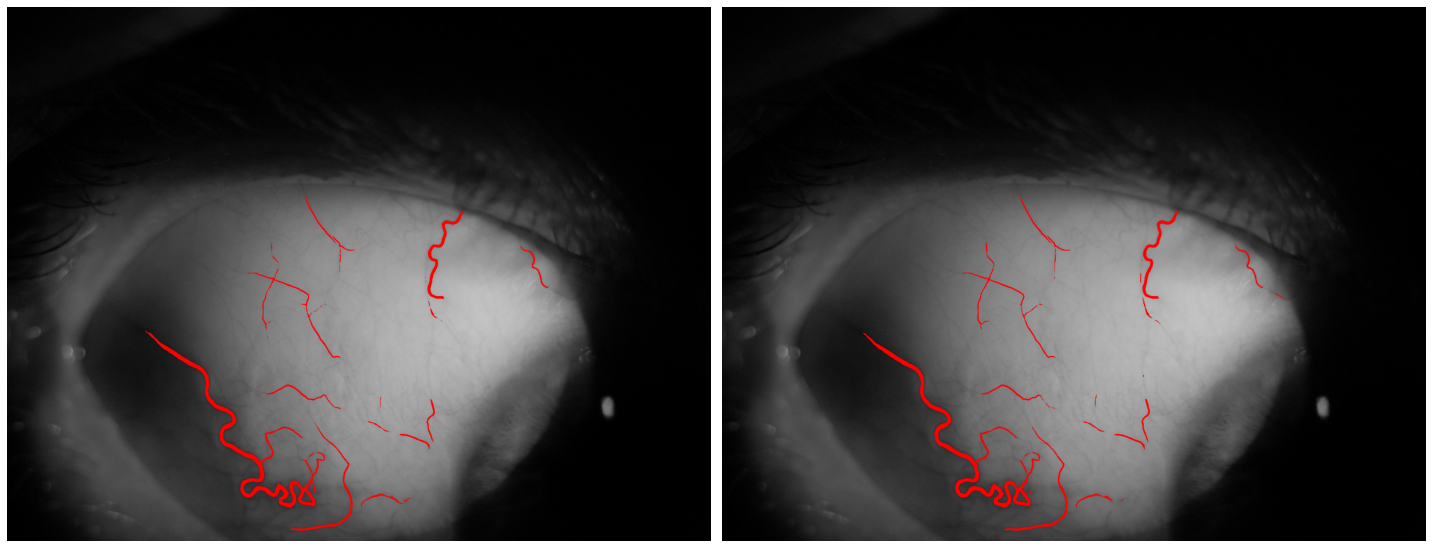

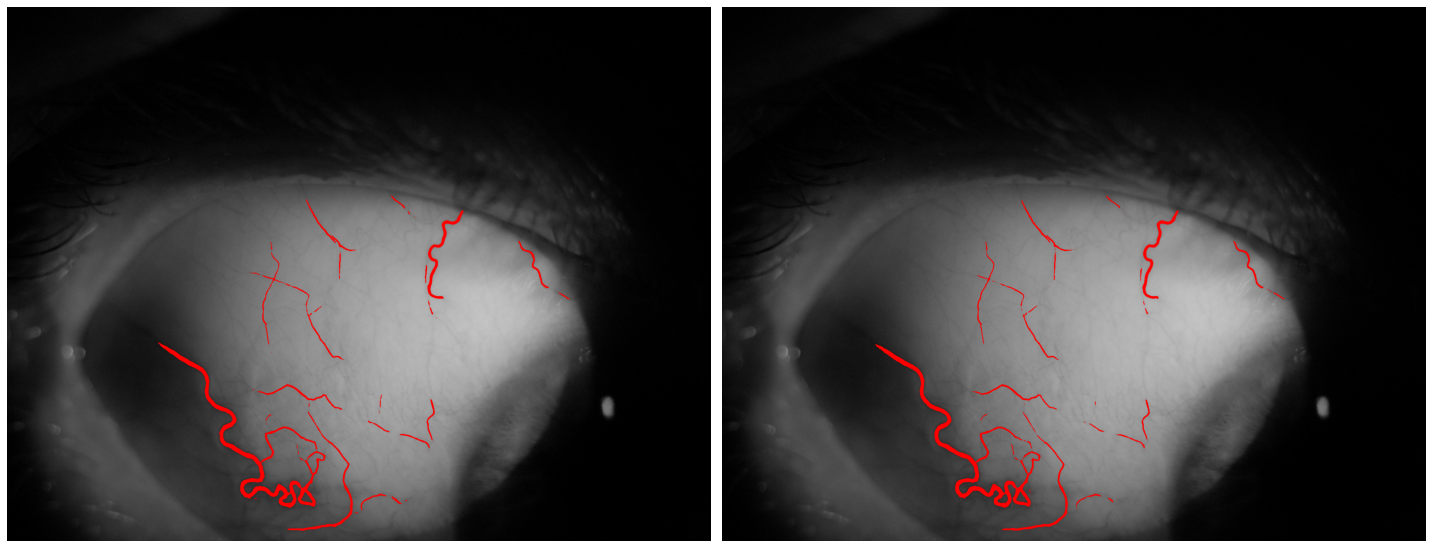

In [198]:
index = np.random.randint(len(bi))

plot_side_by_side(draw_mask(bi[index],k161[index]),draw_mask(bi[index],k161f[index]))
plot_side_by_side(draw_mask(bi[index],k162[index]),draw_mask(bi[index],k162f[index]))


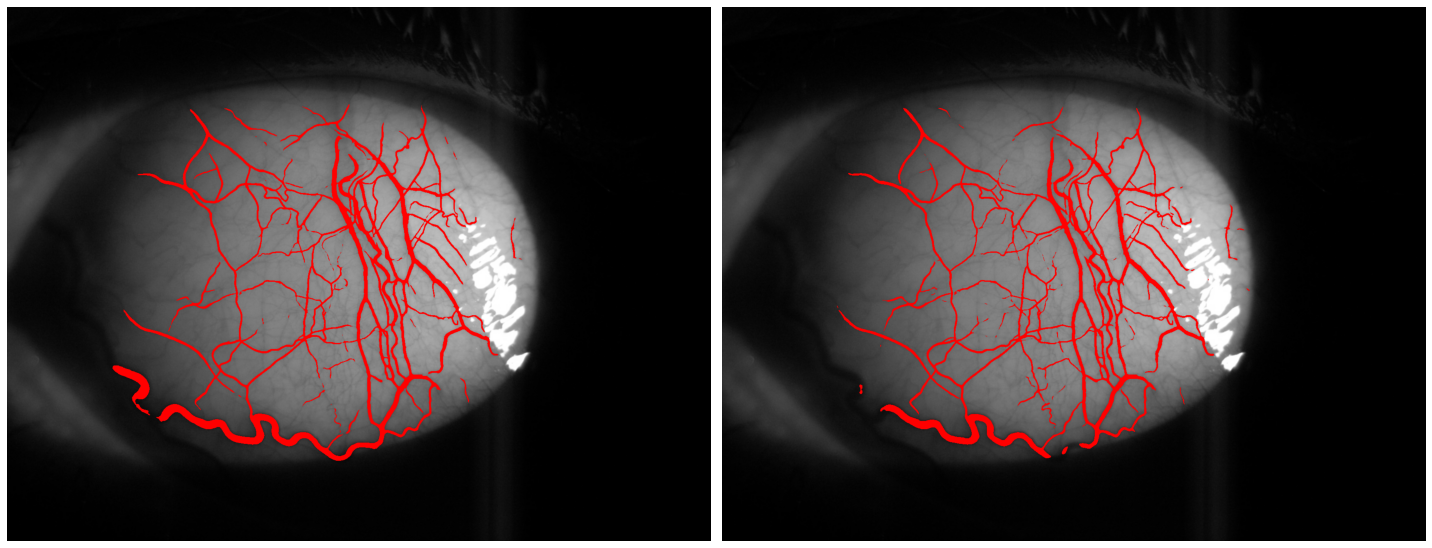

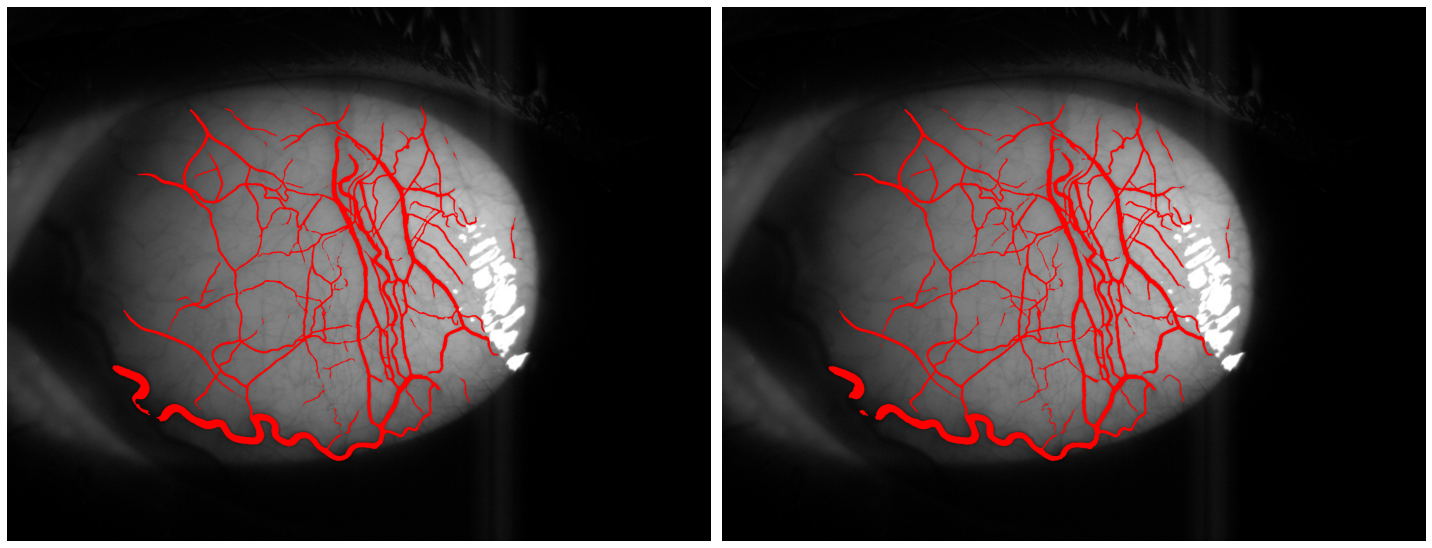

In [183]:
index = np.random.randint(len(bi))
# plot_side_by_side(draw_mask(bi[index],k2[index]),bi[index].convert('RGB'))
# plot_side_by_side(draw_mask(bi[index],k5[index]),draw_mask(bi[index],keras_best[index]))
plot_side_by_side(draw_mask(bi[index],k15f[index]),draw_mask(bi[index],k14[index]))
plot_side_by_side(draw_mask(bi[index],k15f[index]),draw_mask(bi[index],k15[index]))
# plot_side_by_side(draw_mask(bi[index],k5[index]),draw_mask(bi[index],k2[index]))
# plot_side_by_side(draw_mask(bi[index],k5[index]),draw_mask(bi[index],k3[index]))
# plot_side_by_side(draw_mask(bi[index],k10[index]),draw_mask(bi[index],k8[index]))
# plot_side_by_side(draw_mask(bi[index],k2[index]),draw_mask(bi[index],k1[index]))
# plot_side_by_side(draw_mask(bi[index],keras_800f[index]),draw_mask(bi[index],keras_1632_2[index]))
# plot_side_by_side(draw_mask(bi[index],keras_800f[index]),draw_mask(bi[index],keras_best[index]))
# plot_side_by_side(draw_mask(bi[index],keras_800f[index]),draw_mask(bi[index],keras_1632_2[index]))

In [117]:
# index = np.random.randint(len(filenames))
# index = 0
# index = filenames.index('866.png')

plot_side_by_side(draw_mask(bi[index],keras_current[index]),draw_mask(bi[index],torch_best[index]))
# plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],keras_view_4f_sub[index]))
plot_side_by_side(draw_mask(bi[index],keras_current[index]),draw_mask(bi[index],keras_best[index]))
plot_side_by_side(draw_mask(bi[index],keras_current[index]),draw_mask(bi[index],keras_last[index]))
plot_side_by_side(draw_mask(bi[index],keras_current[index]),draw_mask(bi[index],keras_current_f[index]))
plot_side_by_side(draw_mask(bi[index],keras_current[index]),draw_mask(bi[index],keras_current_f2[index]))
# plot_side_by_side(draw_mask(bi[index],keras_5f[index]),draw_mask(bi[index],old_best[index]))

NotADirectoryError: [Errno 20] Not a directory: 'unet_checkpoint_best/resnet34_backbone_200epochs_bs4_lr0.002_size800.hdf5/1056.png'

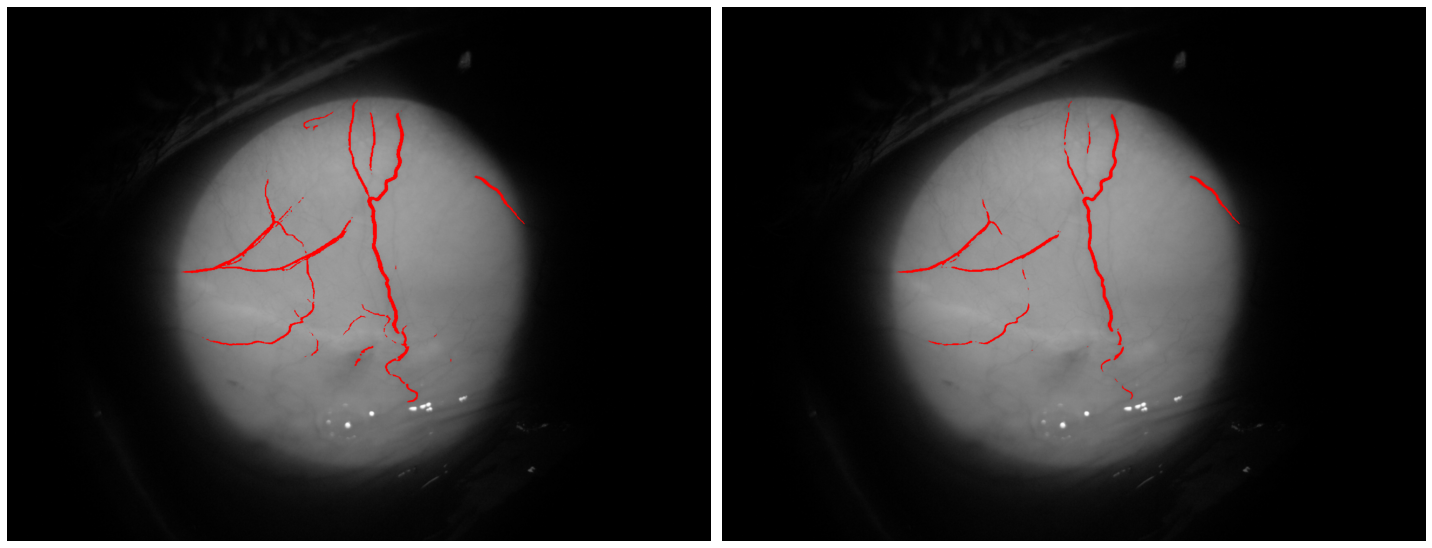

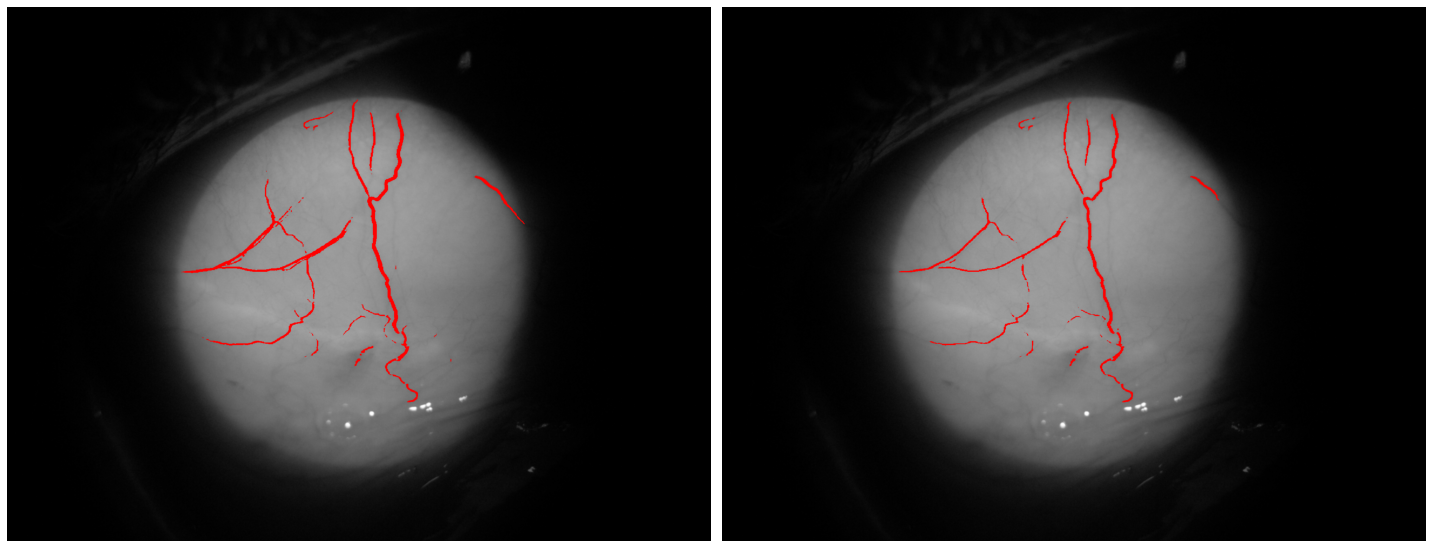

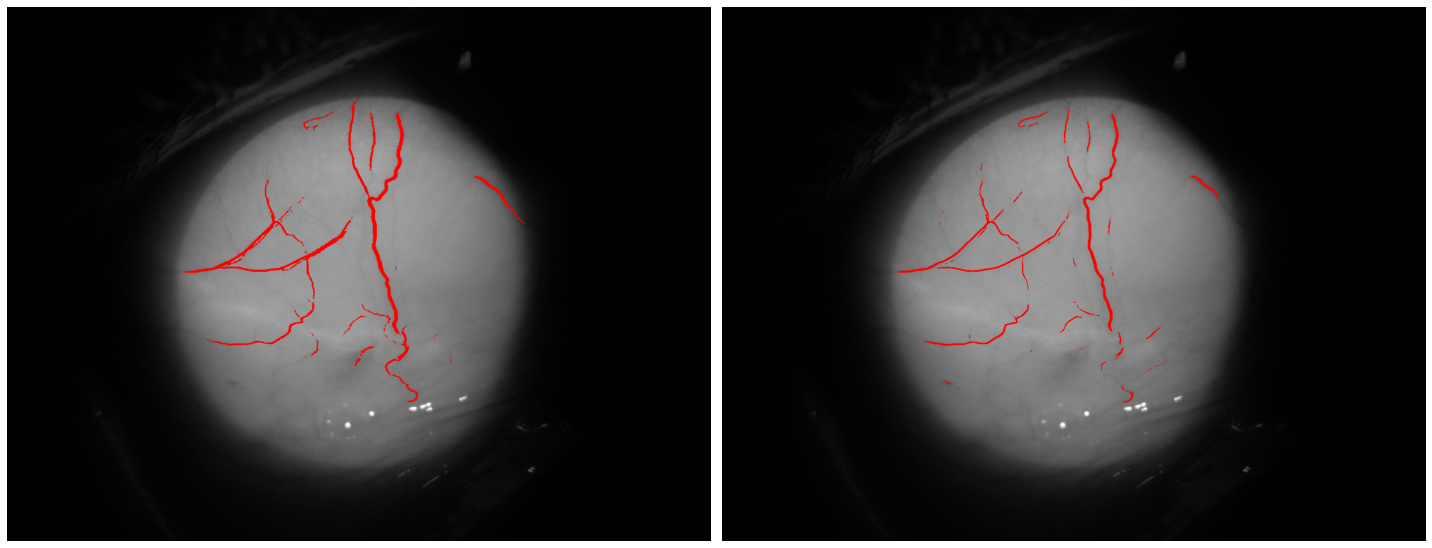

In [58]:
index = np.random.randint(len(filenames))
# index = filenames.index('866.png')

plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],torch_best[index]))
# plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],keras_view_4f_sub[index]))
plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],keras_best[index]))
plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],keras_current[index]))
# plot_side_by_side(draw_mask(bi[index],keras_5f[index]),draw_mask(bi[index],old_best[index]))

In [11]:
index = np.random.randint(len(filenames))

plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],keras_view_4f[index]))
# plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],keras_view_4f_sub[index]))
plot_side_by_side(draw_mask(bi[index],ans[index]),draw_mask(bi[index],old_best[index]))

NameError: name 'ans' is not defined

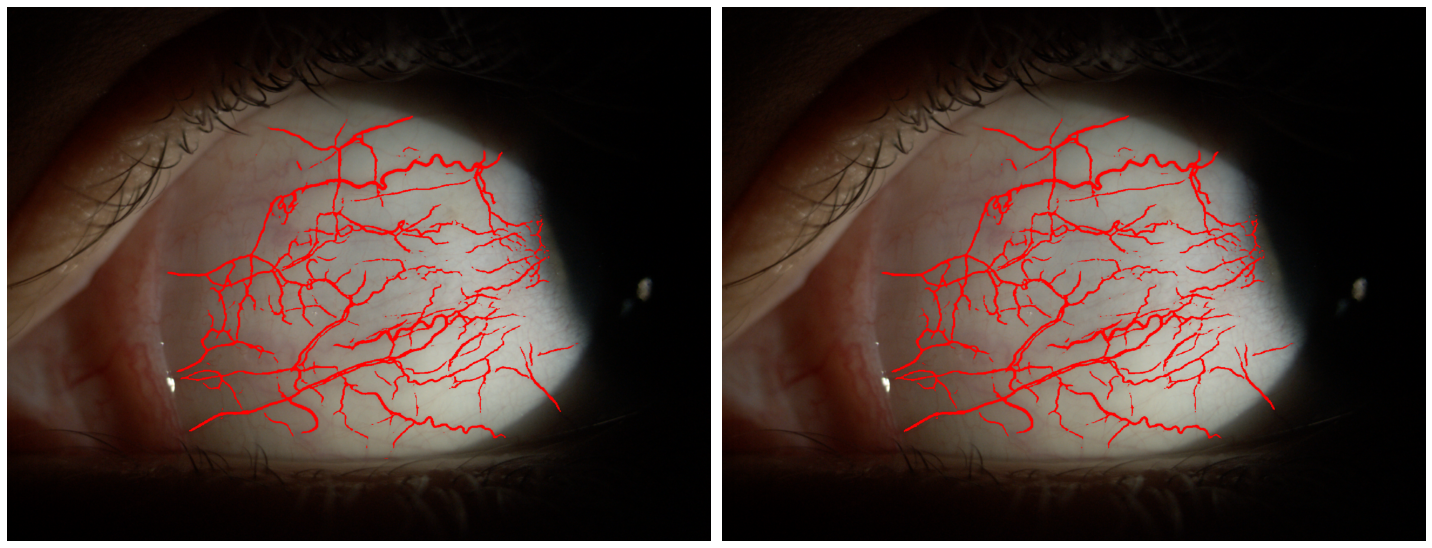

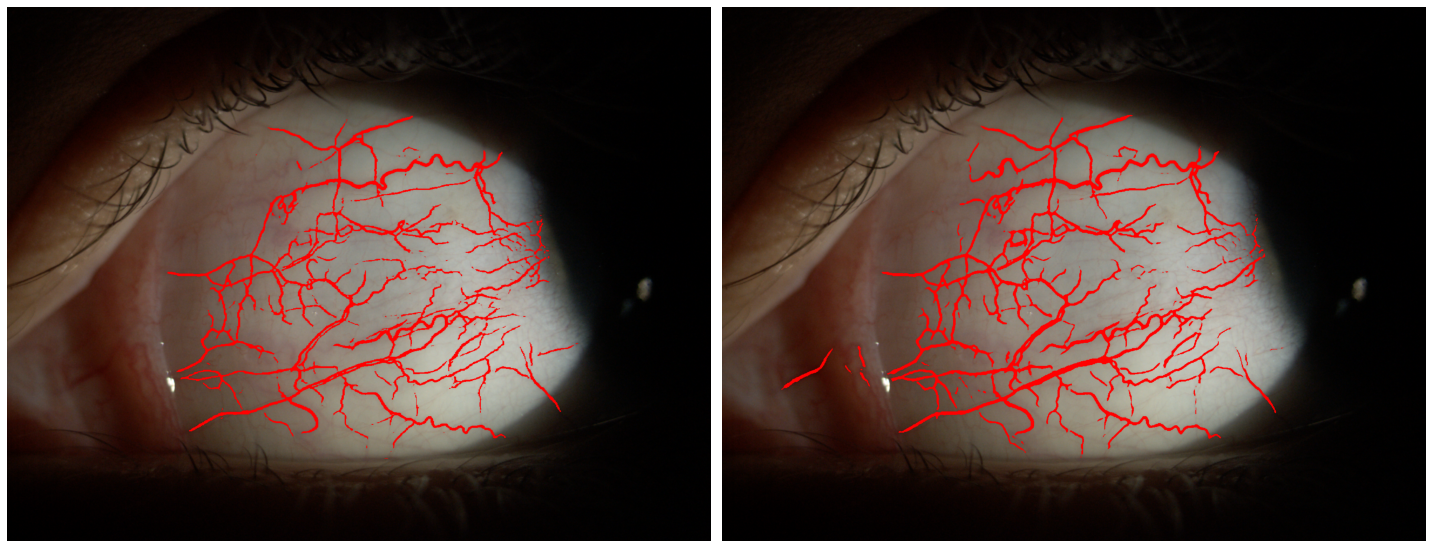

In [393]:
# index = np.random.randint(len(filenames))
index = filenames.index('874.png')

plot_side_by_side(draw_mask(bi[index],keras_view_4ff[index]),draw_mask(bi[index],keras_view_4f[index]))
plot_side_by_side(draw_mask(bi[index],keras_view_4ff[index]),draw_mask(bi[index],old_best[index]))

In [17]:
!mkdir ansemble_torchbest+kerasbest+keraslast

In [18]:
from tqdm import trange
folder = 'ansemble_torchbest+kerasbest+keraslast'
os.makedirs(folder, exist_ok=True)
for i in trange(len(filenames)):
    ans[i].convert('L').save(f'{folder}/{filenames[i]}')
#     ans[i].point(lambda p: 255 if p > 255//3-1 else 0).convert('L').save(f'yet_another_ansemble_2/{filenames[i]}')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:20<00:00, 14.51it/s]


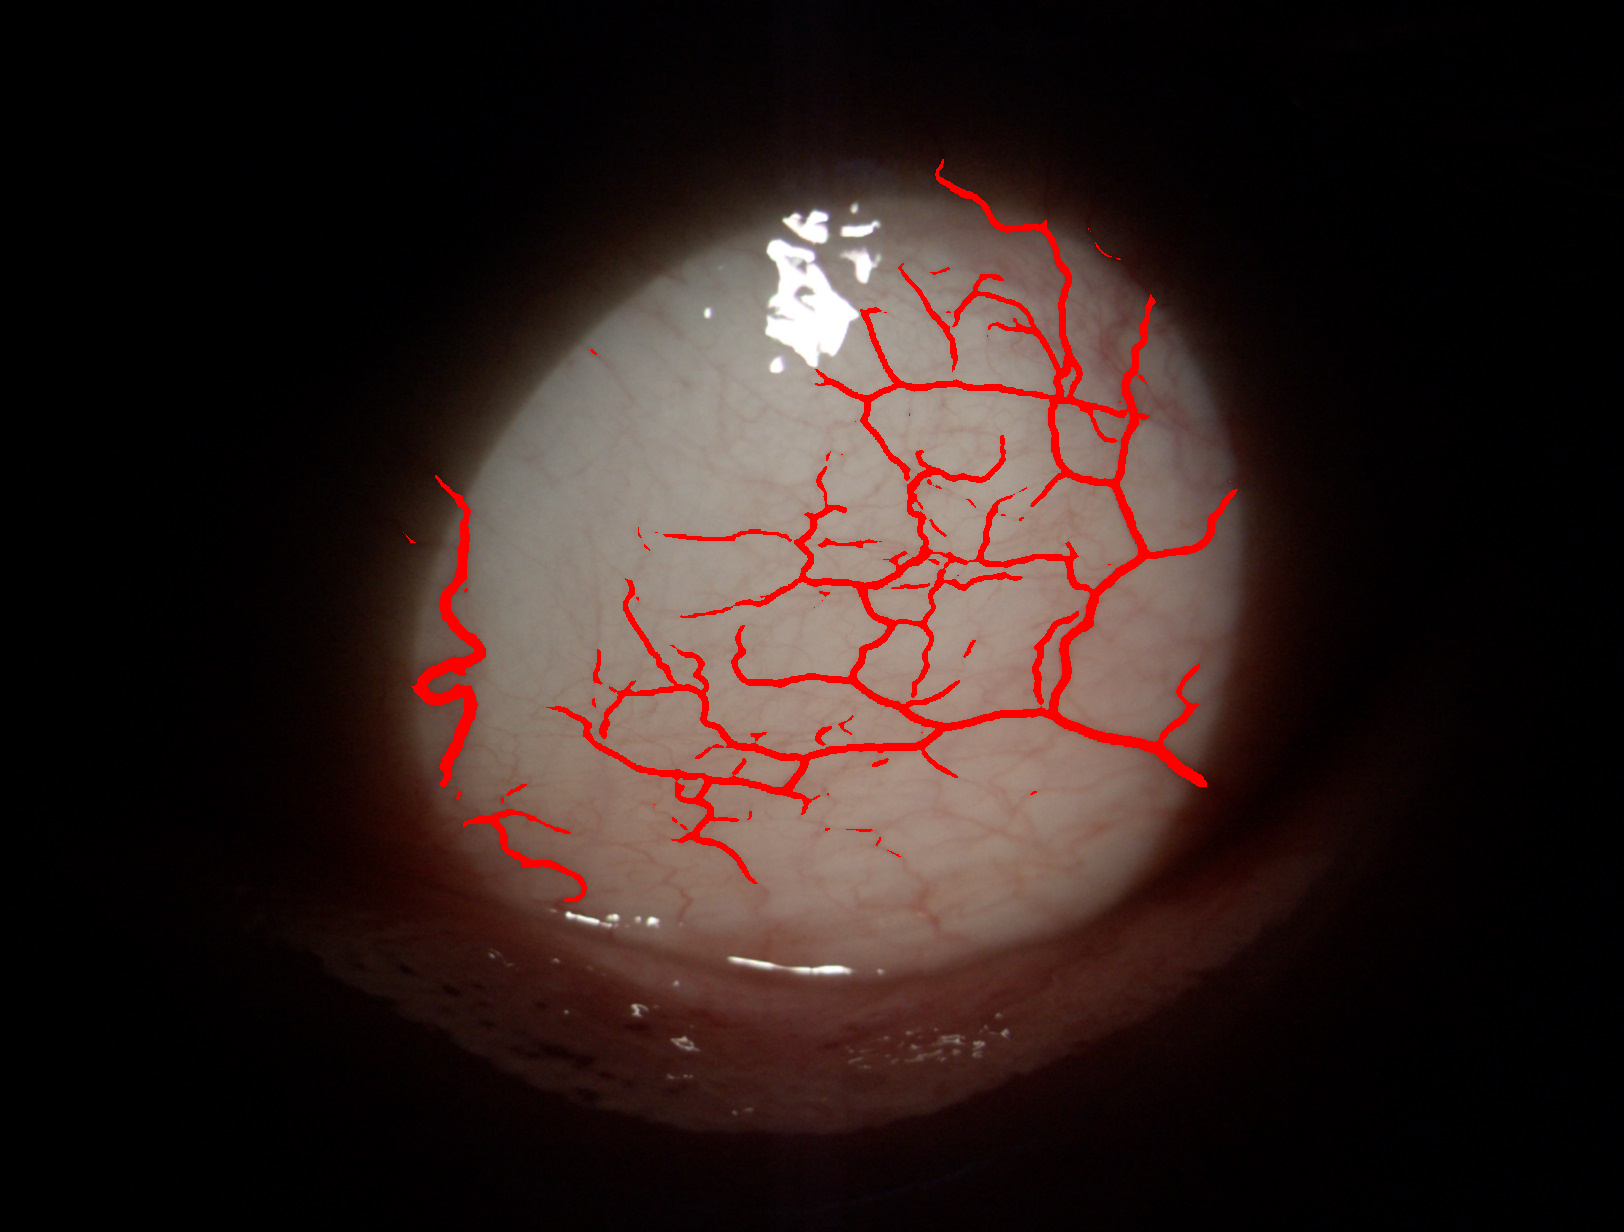

In [311]:

# index = np.random.randint(len(filenames))#filenames.index('831.png')
draw_mask(bi[index],ans[index])

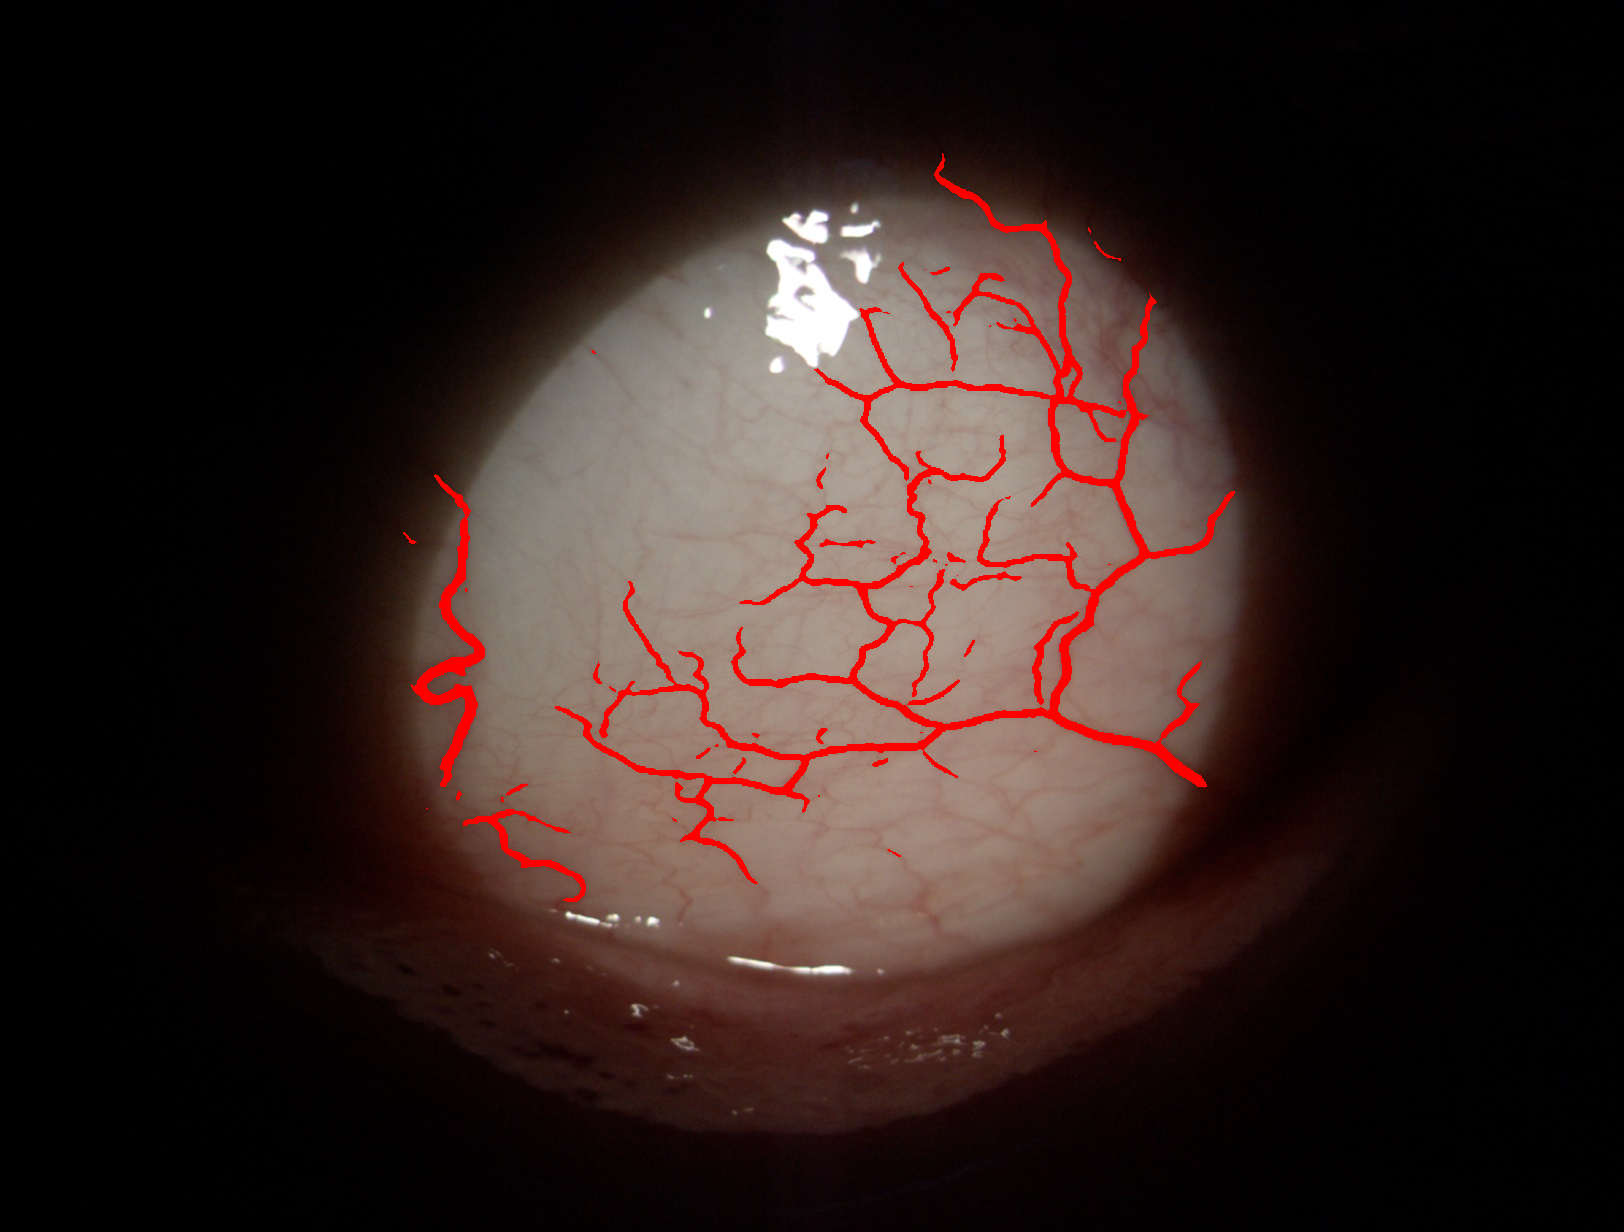

In [310]:
draw_mask(bi[index],zp_hrez[index].point(lambda x: 255 if x > 100 else 0))